## 121: Best Time to Buy and Sell Stock
## https://leetcode.com/problems/best-time-to-buy-and-sell-stock/
## Jagadeesh Vasudevamurthy

In [2]:
import sys
import os
from time import process_time 
print(sys.version)

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]


# WRITE CODE BELOW

In [3]:
############################################################
# Solution.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2022
###########################################################
############################################################
# All imports
###########################################################
from typing import List

class Solution:
    work = 0
    def __init__(self):   
        self.work = 0
        self.buy = 0
        self.sell = 0
        self.tbuy = 0
        self.tsell = 0      

    ##LEETCODE INTERFACE.  DO NOT CHANGE
    ## YOU CANNOT CHANGE ANYTHING
    def maxProfit(self, prices: List[int]) -> int:
        if False:
            [sellday, buyday, work] = self.nsquare_time_constant_space(prices)
        if False:
            [sellday, buyday, work] = self.nlogn_time_logn_space(prices)
        if True:
            [sellday, buyday, work] = self.ntime_constant_space(prices)
        p = self._compute_profit(prices, sellday, buyday)
        return p

    #############################################
    # All public function here. 
    #############################################

    ########################################
    # TIME:THETA(N^2)
    # Space:THETA(1)
    # CANNOT CHANGE ANYTHING BELOW
    #########################################
    def nsquare_time_constant_space(self, a: List[int]) -> "[sellday,buyday,work]":
        return self._nsquare_time_constant_space(a) 

    ########################################
    # TIME:THETA(NlogN)
    # Space:THETA(logn)
    # CANNOT CHANGE ANYTHING BELOW
    #########################################
    def nlogn_time_logn_space(self, a: List[int]) -> "[sellday,buyday,work]":
        return self._nlogn_time_logn_space(a)

    ########################################
    # TIME:THETA(N)
    # Space:THETA(1)
    # CANNOT CHANGE ANYTHING BELOW
    #########################################
    def ntime_constant_space(self, a: List[int]) -> "[sellday,buyday,work]":
        return self._ntime_constant_space(a)

    #############################################
    # All private function here. 
    # WRIYE CODE BELOW
    # You can have any number of private functions and variables
    # NOTHING CAN BE CHABGED BELOW
    #############################################
    def _compute_profit(self, a: List[int], s: "int", b: "int") -> "int":
        n = len(a)
        if n == 0:
            return 0
        assert s >= 0 and s < n
        assert b >= 0 and b < n
        assert s >= b
        p = a[s] - a[b]
        if p < 0:
            return 0
        return p

    def _nsquare_time_constant_space(self, a: List[int]) -> "[Sell, buyday, work]":
        ans = 0
   
        res = [0,0,0]
        self.work  = 0
        for i in range(len(a)):
            for j in range(i,len(a)):
                self.work +=1
                if a[j] - a[i] > ans:
                    ans = a[j] - a[i]
                    res[0] = j
                    res[1] = i
                    
                    
        res[2] = self.work
        return res

    def _nlogn_time_logn_space(self, a: List[int]) -> "Sell, buyday, work]":
        a = self._recursive_helper(a, 0, len(a)-1)
        
        return [a[2], a[1],self.work]

    def _recursive_helper(self,A, st, stop):
        n = stop - st
        self.work +=1

        if n == 0:
            return 0, st, st

        if n == 1:
            return A[stop] - A[st], st, stop

        mid = int(st + n/2)

        max_p_1, buy1, sell1 = self._recursive_helper(A, st, mid-1)
        max_p_2, buy2, sell2 = self._recursive_helper(A, mid, stop)

        l = st
        l_val = A[st]
        for k in range(st+1, mid):
            if A[k] < l_val:
                l_val = A[k]
                l = k

        r = mid
        r_val = A[mid]
        for k in range(mid+1, stop+1):
            if A[k] > r_val:
                r_val = A[k]
                r = k

        max_p = r_val - l_val

        if max_p_2 > max_p_1:
            if max_p > max_p_2:
                return max_p, l, r
            else:
                return max_p_2, buy2, sell2
        else:
            if max_p > max_p_1:
                return max_p, l, r
            else:
                return max_p_1, buy1, sell1
        
    def _ntime_constant_space(self, a: List[int]) -> "[sellday,buyday,work]":
        l = 0
        r = 1
        profit= 0
        buy = 0
        sell = 1
        if(len(a) == 1):
            return [0,0,0]
        while r < len(a):
            self.work+=1
            if a[l] < a[r]:
                pro = a[r] - a[l]
                if pro>profit:
                    profit = pro
                    buy = l
                    sell = r
            else:
                l = r
            r+=1
        return [sell,buy,self.work]


##  CANNOT CHANGE ANYTHING BELOW

## Util.py

In [4]:
############################################################
# Util.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2020
###########################################################

############################################################
# NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################

import sys  # For getting Python Version
import random
import math
from time import process_time


class Util:
    pass

    ############################################
    # generate_random_number start to end INCLUDED
    # start to end INCLUDED
    #########################################
    def generate_a_random_number(self, start: int, end: int) -> "int":
        v = random.randrange(start, end + 1)
        return v

    ############################################
    # generate_random_number GENERATES  N random numbers betweem
    # start to end INCLUDED
    # if onlypositive is False, generates both pos and negative number
    #  randrange(beg, end, step) :-
    #  beginning number (included in generation),
    #  last number (excluded in generation) a
    #  nd step ( to skip numbers in range while selecting).
    #########################################
    def generate_random_number(
        self, N: int, onlypositive: bool, start: int, end: int
    ) -> "List of integer":
        a = []
        for i in range(N):
            v = self.generate_a_random_number(start, end)
            if onlypositive == False:
                if (i % 2) == 0:  ##//Even. Half are positive, Half are negative
                    v = -v
            a.append(v)
        return a

    ############################################
    # swap
    #########################################
    def swap(self, a: "List of integer", i: "int", j: "int"):
        t = a[i]
        a[i] = a[j]
        a[j] = t

    ############################################
    # generate shuffled number between 0 to n
    # n-1 not encluded
    #########################################
    def generate_suffled_number_between_1_to_n(self, n: int) -> "List of integer":
        a = []
        for i in range(n):
            a.append(i)

        for i in range(n):
            j = self.generate_a_random_number(0, n - 1)
            k = self.generate_a_random_number(0, n - 1)
            self.swap(a, j, k)
        return a

    ############################################
    # generate n numbers in ascending order from 0 to n-1
    #########################################
    def generate_n_numbers_in_ascending_order(self, n: int) -> "List of integer":
        a = []
        for i in range(n):
            a.append(i)
        return a

    ############################################
    # generate n numbers in descending order from n-1 to 0
    #########################################
    def generate_n_numbers_in_desscending_order(self, n: int) -> "List of integer":
        a = []
        for i in range(n - 1, -1, -1):
            a.append(i)
        return a

    ############################################
    # generate n same k number
    #########################################
    def generate_n_same_k_number(self, n: int, k: "int") -> "List of integer":
        a = []
        for i in range(n):
            a.append(k)
        return a

    ############################################
    # print_index(10)
    #    0   1   2   3   4   5   6   7   8   9
    #########################################
    def print_index(self, n: int):
        for i in range(n):
            print("{:4d}".format(i), end="")
        print()

    ############################################
    # a = [7,8,9, 23, 100]
    # print_list(a)
    # 7   8   9  23 100
    #########################################
    def print_list(self, a: "list"):
        for i in range(len(a)):
            print("{:4d}".format(a[i]), end="")
        print()

    ############################################
    # a = [7,8,9, 1, 100]
    # crash
    #########################################
    def assert_ascending_range(self, a: "list", start: int, includingend: int):
        t = a[start]
        for i in range(start + 1, includingend):
            if a[i] < t:
                assert False
            t = a[i]

    ############################################
    # a = [7,8,9, 1, 100]
    # crash
    #########################################
    def assert_ascending(self, a: "list"):
        if len(a):
            self.assert_ascending_range(a, 0, len(a))

    ############################################
    # log to the next possible integer
    #########################################
    def log_upper_bound(self, n: "int", b: "int") -> "int":
        f = math.log(n, b)
        c = math.ceil(f)
        return c

    ############################################
    # log to the smallest possible integer
    #########################################
    def log_lower_bound(self, n: "int", b: "int") -> "int":
        f = math.log(n, b)
        c = math.floor(f)
        return c

    ############################################
    # sqrt to the next possible integer
    #########################################
    def sqrt_upper_bound(self, n: "int") -> "int":
        f = math.sqrt(n)
        c = math.ceil(f)
        return c

    ############################################
    # sqrt to the smallest possible integer
    #########################################
    def sqrt_lower_bound(self, n: "int") -> "int":
        f = math.sqrt(n)
        c = math.floor(f)
        return c


## TEST BENCH

In [5]:
############################################################
# Stock1.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2020
###########################################################

############################################################
#           NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
from typing import List
#from Util import *
from time import process_time
#from Solution import *


class Stock1:
    def __init__(self):
        self._show = False
        self._u = Util()
        self._testBench()

    def _nsquare_time_constant_space(self, a: List[int]) -> "[sellday,buyday,work]":
        s = Solution()
        return s.nsquare_time_constant_space(a)  # Function to implement

    def _nlogn_time_logn_space(self, a: List[int]) -> "[sellday,buyday,work]":
        s = Solution()
        return s.nlogn_time_logn_space(a)  # Function to implement

    def _ntime_constant_space(self, a: List[int]) -> "[sellday,buyday,work]":
        s = Solution()
        return s.ntime_constant_space(a)  # Function to implement

    def _testBench(self):
        self._tests()
        self._testn()
        print("ALL TESTS PASSED")

    def _test1(self, a: List[int]):
        n = len(a)
        if self._show:
            self._u.print_index(n)
            self._u.print_list(a)

        [sellday1, buyday1, work1] = self._nsquare_time_constant_space(a)
        p1 = self._compute_profit(a, sellday1, buyday1)
        if self._show:
            print("nsquare_time_constant_space", "work =", work1, "Profit =", p1)

        [sellday2, buyday2, work2] = self._nlogn_time_logn_space(a)
        p2 = self._compute_profit(a, sellday2, buyday2)
        if self._show:
            print("nlogn_time_logn_space", "work =", work2, "Profit =", p2)

        if p1 != p2:
            print("Why profits are different", p1, p2)
            assert p1 == p2

        [sellday3, buyday3, work3] = self._ntime_constant_space(a)
        p3 = self._compute_profit(a, sellday3, buyday3)
        if self._show:
            print("n_time_logn_space", "work =", work3, "Profit =", p3)

        if p1 != p3:
            print("Why profits are different", p1, p3)
            assert p1 == p3
        return [work1, work2, work3]

    def _compute_profit(self, a: List[int], s: "int", b: "int") -> "int":
        n = len(a)
        if n == 0:
            return 0
        assert s >= 0 and s < n
        assert b >= 0 and b < n
        assert s >= b
        p = a[s] - a[b]
        return p

    def _tests(self):
        self._show = True
        s = [5, 10, 4, 6, 12]
        self._test1(s)

        s = [7, 1, 5, 3, 6, 4]
        self._test1(s)

    def _testn(self):
        self._show = False
        n = 100

        print("----------", n, " ascending tests------------")
        a = self._u.generate_n_numbers_in_ascending_order(n)
        work = self._test1(a)
        print("nsquare_time_constant_space work", work[0])
        print("nlogn_time_logn_space work", work[1])
        print("n_time_constant_space work", work[2])
        print("ascending tests passed")

        print("----------", n, " descending tests------------")
        a = self._u.generate_n_numbers_in_ascending_order(n)
        work = self._test1(a)
        print("nsquare_time_constant_space work", work[0])
        print("nlogn_time_logn_space work", work[1])
        print("n_time_constant_space work", work[2])
        print("descending tests passed")

        print("----------", n, " same value tests------------")
        a = self._u.generate_n_same_k_number(n, 7)
        work = self._test1(a)
        print("nsquare_time_constant_space work", work[0])
        print("nlogn_time_logn_space work", work[1])
        print("n_time_constant_space work", work[2])
        print("same value tests passed")

        n = 500
        print("----------", n, " random tests------------")
        work = [0, 0, 0]
        for i in range(n):
            a = self._u.generate_random_number(n, False, 1, 101)
            w = self._test1(a)
            work[0] = work[0] + w[0]
            work[1] = work[1] + w[1]
            work[2] = work[2] + w[2]
        print("nsquare_time_constant_space work", work[0])
        print("nlogn_time_logn_space work", work[1])
        print("n_time_constant_space work", work[2])
        print("All", n, "Random tests passed. You are a guru in stock trading")


############################################################
# main
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print("Testing Stock1.py Starts")
    s = Stock1()
    print("Testing Stock1.py Ends")
    print("Upload only Solution.py and output of the program as shown above")
    print("For A all tests must pass")


############################################################
# numCourses up
###########################################################
if __name__ == "__main__":
    main()


Testing Stock1.py Starts
   0   1   2   3   4
   5  10   4   6  12
nsquare_time_constant_space work = 15 Profit = 8
nlogn_time_logn_space work = 5 Profit = 8
n_time_logn_space work = 4 Profit = 8
   0   1   2   3   4   5
   7   1   5   3   6   4
nsquare_time_constant_space work = 21 Profit = 5
nlogn_time_logn_space work = 7 Profit = 5
n_time_logn_space work = 5 Profit = 5
---------- 100  ascending tests------------
nsquare_time_constant_space work 5050
nlogn_time_logn_space work 133
n_time_constant_space work 99
ascending tests passed
---------- 100  descending tests------------
nsquare_time_constant_space work 5050
nlogn_time_logn_space work 133
n_time_constant_space work 99
descending tests passed
---------- 100  same value tests------------
nsquare_time_constant_space work 5050
nlogn_time_logn_space work 133
n_time_constant_space work 99
same value tests passed
---------- 500  random tests------------
nsquare_time_constant_space work 62625000
nlogn_time_logn_space work 332500
n_time

In [6]:
# Leetcode Screenshot

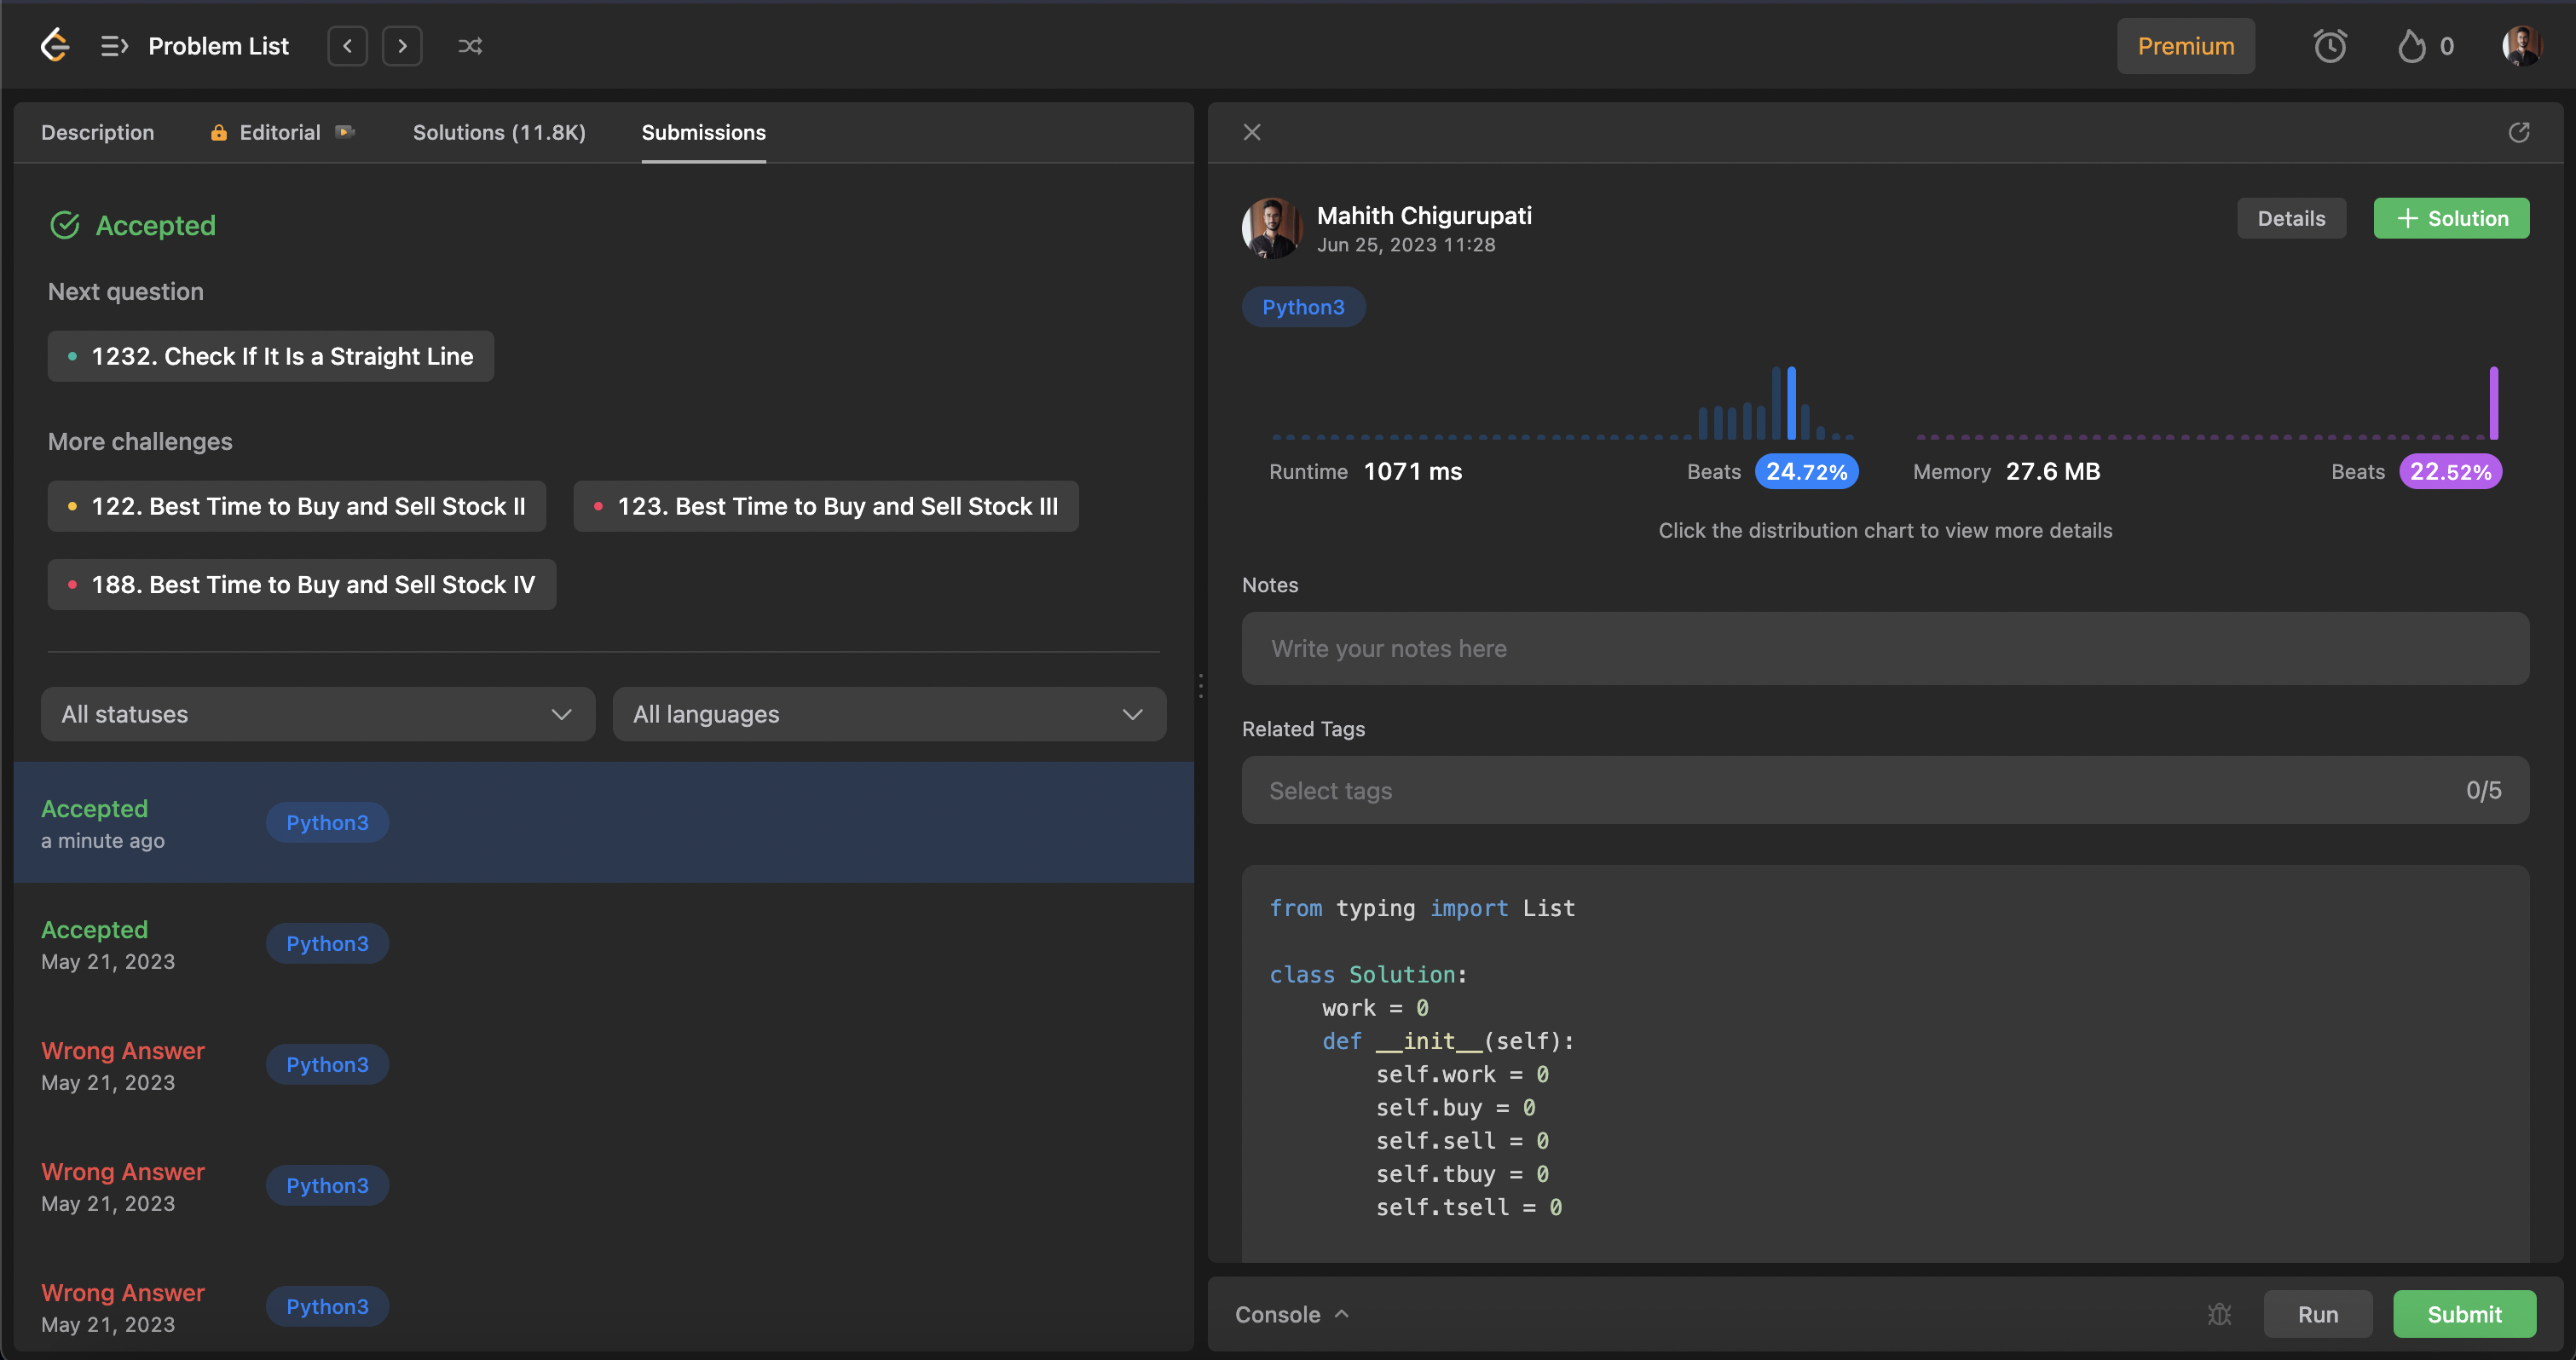